`Carblog dataset` 은 네이버 블로그에서 자동차 이름 혹은 자동차와 관련된 27 개의 질의어를 포함한 포스트를 수집한 데이터입니다. 모든 질의어에 대한 데이터의 양은 약 10 GB 이기 때문에 `lovit_textmining_dataset` 에서는 세 종류의 질의어에 대한 데이터만 포함시켰습니다. 모든 질의어에 대한 데이터는 [https://github.com/lovit/carblog_dataset](https://github.com/lovit/carblog_dataset) 에서 다운로드 받을 수 있습니다.

| 질의어 | 카테고리 id |
| --- | --- |
| 소나타 | 10 |
| 티볼리 | 21 |

이 튜토리얼에서는 질의어 `소나타`가 포함된 블로그 포스트를 이용한 문서 군집화를 수행합니다. 텍스트는 `carblog_dataset.load_text` 함수를 이용하면 list of str 형태로 로딩이 됩니다.

In [1]:
import config
from lovit_textmining_dataset.carblog_dataset import load_text
from pprint import pprint

texts = load_text(category=10)

soynlp=0.0.493
added lovit_textmining_dataset


약 23 만 여개의 문서로 이뤄진 이 데이터에는 `차량 소나타`와 관련된 포스트들도 존재하지만, `클래식 형식 소나타`와 관련된 포스트들도 존재합니다. 차량과 관련된 문서만을 선택하기 위하여 문서 군집화 방법과 군집화 레이블링 방법을 이용할 것입니다.

In [2]:
print('num docs = {}'.format(len(texts)), end='\n\n')
print(texts[0], end='\n\n')
print(texts[1])

num docs = 229253

2011녕 4월 출장 광택 코팅 유명한 소나타

드보르자크 신세계교향곡 4악장 드보르자크의 신세계교향곡 4악장입니다 Dvorak의 Symphony No 9 From the New World 4th movement 이라고도 하죠 이 노래 되게 유명하죠 앞부분 한 10초 가량이 영화 죠스 를 닮았다고 해서요 제 생각에는 그 전 부터 유명했을 것 같아요 초등학교 때 제가 합주부에서 마림바를 담당했었는데 말이죠 저희 학교는 브람스의 헝가리무곡 제 5번을 연주했었어요 대회날 가서 다른 학교들의 공연을 관람했었는데 모 초등학교에서 초등학생들을 데리고 이 신세계교향곡 4악장을 연주하는데 포스가 남다르더군요 악기부터가 달랐어요 저희 학교는 바이올린 첼로 이런 현악기들을 위주로 했었는데 그 학교는 현악기는 물론이고 트럼본 호른 뭐 이런 관악기들을 가지고 와서 떵떵거리며 연주하는데 참 박진감있고 좋았어요 그학교도 결국 결승에 올라가고 저희학교도 결승에 올라갔다죠 그래서 박진감 있는 동영상들을 뒤져봤는데 이 동영상이 그나마 제일 박진감 있는 것 같아요 4악장 알레그로 콘 포코E단조 4 4박자 소나타 형식 저음현이 연주하는 육중한 서주에 이어 1주제가 힘차게 연주된다 이 주제의 앞쪽 절반은 응원전 같은 데서도 자주 들을 수 있다 이어 클라리넷이 2주제를 아름답게 연주하며 3악장 스케르초 주제도 등장한다 발전부는 1주제 및 1악장 1주제 2악장의 주요주제 3악장 스케르초 주제 등이 어우러져 화려하게 전개되며 재현부 다음의 코다에서도 각 악장의 주요 주제가 골고루 회상된다 여운을 남기는 관악기의 긴 화음으로 곡이 마무리된다 드보르자크가 이 곡을 만들게 된 동기와 과정 그는 이 1891년에 프라하 음악원의 작곡과 교수에 임명되었으며 그 뒤 얼마 되지도 않아 미국에서 음악원 원장 자리를 제의받았다 작곡과 교수 월급의 세 배가 넘는 거액의 급료는 물론이고 4개월에 걸친 휴가와 연주회를 한 해에 10회 지휘할 수 있다는 조건까지 덧붙여서 음악가라면 누구라도 

블로그에는 평상시에는 잘 이용되지 않는 단어들이 많습니다. 이들을 간단하게 처리하기 위하여 간단한 단어 추출 방법과 토크나이저를 만들었습니다. Droprate 는 subword $w$ 의 단어 점수를 정의하는 방법으로, 다음과 같이 정의됩니다. Subword $w$ 의 빈도수와 $w$ 에 임의의 한 글자 $c$ 가 더해진 subword $w+c$ 의 빈도수의 비율이 1 에 가깝다는 것은 subword $w$ 의 오른쪽이 아직 단어 경계가 아님을 의미합니다. 예를 들어 `소나`의 빈도수가 1000 이고, `소나타`의 빈도수가 980 이라면 `소나`는 `소나타`를 의미하는 부분단어일 가능성이 높습니다. 하지만 `소나타`를 포함하는 가장 빈도수가 큰 subword 가 `소나타의`라면 `소나타`가 단어이기 때문에 `소나타의`의 빈도수는 상대적으로 작아집니다. 만약 `소나타의`의 빈도수가 100 이라면 `소나`와 `소나타`의 droprate 단어 점수는 각각 1 - 980/1000 = 0.02, 1 - 100 / 980 = 0.898 이 됩니다.

$droprate(w) = 1 - \frac{max_{w+c} \#(w+c)}{\#(w)}$

하지만 위와 같은 방법은 정확한 단어 추출 방법이 아닙니다. 사실 이러한 방법의 목적은 비슷한 내용의 문서를 비슷한 벡터로 표현하기 위함입니다. 단어 추출이 완벽히 이뤄지지 않아도 괜찮습니다. 이러한 맥락에서 Subword Tokenizer 를 만들었습니다. 이는 어절의 왼쪽에 존재하는 subwords 중 단어 점수가 특정 값 (아래의 코드에서는 0.4) 이상인 모든 subwords 를 return 하는 토크나이저 입니다. 이와 같은 방법을 이용하여도 블로그의 내용을 표현하는데 필요한 단어 혹은 단어를 포함한 subwords 들이 잘 추출됨을 확인할 수 있습니다.

In [3]:
from subword_tokenizer import word_score_by_droprate
from subword_tokenizer import SubwordTokenizer

# training vocabulary
word_score = word_score_by_droprate(texts, min_count=20)
words = {word for word, score in word_score.items() if score >= 0.4}

tokenizer = SubwordTokenizer(words)
tokenizer.tokenize('소나타란 글자가 포함되어있는 블로그입니다 소나타에는 아이비의 유혹의 소나타와 클래식의 한종류, 광염소나타등의 의미가 있습니다')

['소나타',
 '글자',
 '포함',
 '포함되어',
 '포함되어있',
 '포함되어있는',
 '블로그',
 '소나타',
 '소나타에',
 '아이',
 '아이비',
 '유혹',
 '유혹의',
 '소나타',
 '소나타와',
 '클래식',
 '한종',
 '광염',
 '광염소나타',
 '의미',
 '있습니다']

토크나이저도 만들었으니 이를 이용하여 블로그 포스트들을 벡터로 변환합니다. 다른 분석에 이용될 수도 있으므로 우선 Bag of words model 로 문서를 표현한 뒤, 이를 TF-IDF 로 변환합니다. 필요에 따라서는 BOW 형태의 행렬과 vocabulary index 를 저장합니다. TF-IDF 에 의하여 여러 단어에 공통으로 등장하는 subwords 들의 영향력도 줄어들게 됩니다.

In [4]:
from scipy.io import mmwrite
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# vectorization
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, lowercase=False)
x_tf = vectorizer.fit_transform(texts)
x_tfidf = TfidfTransformer().fit_transform(x_tf)

vocab_to_idx = vectorizer.vocabulary_
idx_to_vocab = sorted(vocab_to_idx, key=lambda v:vocab_to_idx[v])

print(x_tfidf.shape)

# save bow and vocabulary index
SAVE = False

if SAVE:
    mmwrite('sonata-blog-bow.mtx', x_tf)
    with open('sonata-blog-vocabulary', 'w', encoding='utf-8') as f:
        for vocab in idx_to_vocab:
            f.write('{}\n'.format(vocab))

(229253, 80743)


`soyclustering` 의 Spherical k-means 를 이용하여 23 만여개의 문서를 500 개의 군집으로 묶습니다. 학습에는 빠른 초기화를 위하여 `similar_cut` 을 이용하였으며, 학습된 모델에는 TF-IDF 로 표현된 centroid vectors 가 존재합니다. 또한 labels 의 개수로부터 각 군집의 크기도 계산할 수 있습니다. 이후 편하게 보기 위하여 백분율로 군집의 크기를 정규화 하였습니다.

In [5]:
import numpy as np
from soyclustering import SphericalKMeans

kmeans = SphericalKMeans(n_clusters=500, random_state=0, max_iter=10, init='similar_cut', verbose=True)
labels = kmeans.fit_predict(x_tfidf)
centers_tfidf = kmeans.cluster_centers_
cluster_size = np.bincount(labels, minlength=centers_tfidf.shape[0])
cluster_size = 100 * cluster_size / cluster_size.sum() # as percentage

initialization_time=4.373654 sec, sparsity=0.00305
n_iter=1, changed=228064, inertia=167717.558, iter_time=57.813 sec, sparsity=0.188
n_iter=2, changed=74255, inertia=134069.851, iter_time=57.807 sec, sparsity=0.177
n_iter=3, changed=32113, inertia=129677.264, iter_time=57.304 sec, sparsity=0.175
n_iter=4, changed=17698, inertia=128115.961, iter_time=58.576 sec, sparsity=0.174
n_iter=5, changed=11619, inertia=127393.658, iter_time=57.804 sec, sparsity=0.173
n_iter=6, changed=8447, inertia=126949.949, iter_time=57.539 sec, sparsity=0.173
n_iter=7, changed=6277, inertia=126668.448, iter_time=57.423 sec, sparsity=0.172
n_iter=8, changed=5186, inertia=126464.223, iter_time=58.595 sec, sparsity=0.172
n_iter=9, changed=4040, inertia=126283.457, iter_time=57.726 sec, sparsity=0.172
n_iter=10, changed=3346, inertia=126172.587, iter_time=58.143 sec, sparsity=0.172


Bag of words model 형식의 centroid vectors 를 만들고 싶다면 labels 로부터 각 군집에 속하는 문서들을 가져온 뒤, 이들 벡터의 평균을 취합니다.

In [6]:
from sklearn.preprocessing import normalize

centers_tf = np.zeros(centers_tfidf.shape)
for c in range(centers_tf.shape[0]):
    idxs = np.where(labels == c)[0]
    centroid = normalize(x_tf[idxs].sum(axis=0), norm='l1')
    centers_tf[c] = centroid

Subword tokenizer 에 의하여 여러 단어에 공통으로 등장한 subwords 들이 모두 문서의 벡터 표현에 포함되었습니다. 그렇기 때문에 짧은 subwords 는 정보력이 적습니다. 이는 centroid vectors 의 pairwise distance matrix 로부터 확인할 수 있습니다. TF-IDF 를 이용한 centroid vectors 에서는 군집 간의 차이가 어느 정도 생기지만, BOW 를 이용한 centroid vectors 에서는 군집 간의 차이가 상대적으로 덜 선명함을 확인할 수 있습니다.

또한 두 방법 모두 500 개의 군집 중 일부는 서로 비슷한 내용임을 확인할 수 있습니다. Pairwise distance matrix 에서 색이 진할수록 해당 군집 간의 거리가 0 에 가깝다는 의미입니다.

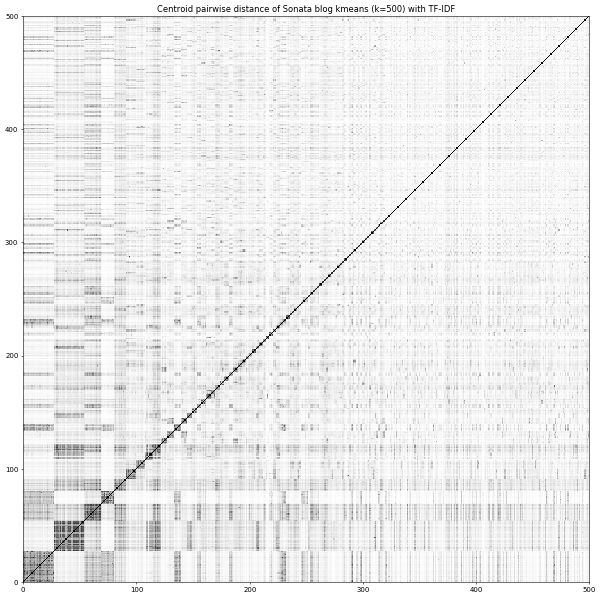

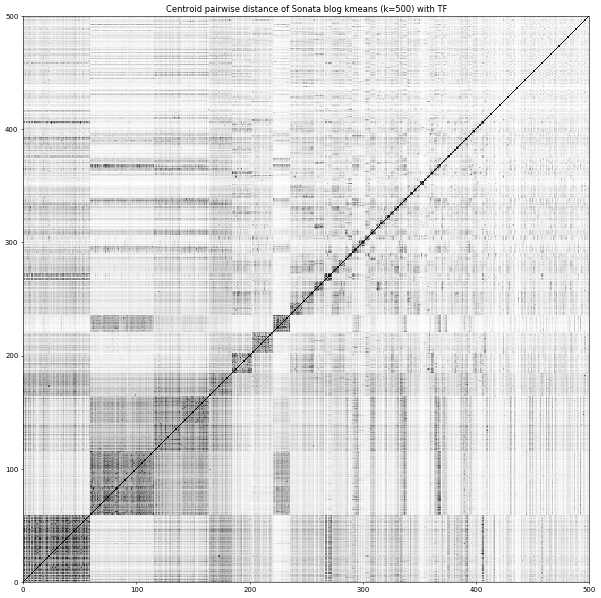

In [7]:
%matplotlib inline

from soyclustering import visualize_pairwise_distance

fig_tfidf = visualize_pairwise_distance(centers_tfidf, max_dist=.7, sort=True,
    title='Centroid pairwise distance of Sonata blog kmeans (k=500) with TF-IDF')
fig_tf = visualize_pairwise_distance(centers_tf, max_dist=.7, sort=True,
    title='Centroid pairwise distance of Sonata blog kmeans (k=500) with TF')

fig_tfidf.savefig('sonata_blog-k500_tfidf.png')
fig_tf.savefig('sonata_blog-k500_tf.png')

상대적 출현빈도를 이용하여 군집 레이블링을 수행합니다. 이번에는 BOW 로 만들어진 centroid vectors 를 이용하여 키워드를 추출합니다. 각 군집마다 300 개의 most frequent subwords 에서 키워드 점수가 0.5 보다 큰 상위 50 개의 subwords 를 각 군집의 키워드로 선택합니다.

In [8]:
from soyclustering import proportion_keywords

keywords = proportion_keywords(centers_tf, labels, topk=50, candidates_topk=300, index2word=idx_to_vocab)

군집 별 키워드의 확인을 편하게 하기 위하여 추출된 keywords 에서 군집 c 의 키워드를 str 형식으로 출력하는 함수를 만듭니다. 이후 군집 c 의 크기가 입력되면 이를 출력하고, 크기가 입력되지 않으면 이를 출력하지 않도록 만들어 둡니다.

In [9]:
def print_keywords(c, keywords, percentage=-1):
    """
    Arguments
    ---------
    c : int
        Cluster index
    keywords : list of list
        [
            [(keyword, score), (keyword, score), ...], # for cluster 0
            [(keyword, score), (keyword, score), ...], # for cluster 1
            ...
        ]
    """
    keywords_str = ', '.join(w for w,s in keywords[c])
    size = '' if percentage == -1 else ' (%.3f %s)' % (percentage, '%')
    print('\nCluster = {}{}\n{}'.format(c, size, keywords_str))

군집 0 번에 대하여 테스트를 수행해 봅니다. 키워드로부터 군집 0 은 모터쇼에 관련된 포스트들이 모여있음을 추측할 수 있습니다.

In [10]:
print_keywords(0, keywords)


Cluster = 0
모터스튜디오, 모델분, 레이싱모델, 서울모터쇼, 컨셉카, 모터쇼, 킨텍스, 부스에, 레이싱걸, 컨셉트카, 모터쇼에서, 컨셉트, 부스, 컨셉, 레이싱, 전시장, 전시되어, 전기차, 관람, 전시, 모터, 모터스, 친환경, 다녀왔, 캐딜락, 차들, 전기, 구경, 재규어, 행사, 있었습니다, 미래, 다녀, 많았, 마세, 멋지, 옆에, 이쁘, 디자인이, 입장, 신기, 브랜드, 포르쉐, 모델, 레이, 2015, 공개, 사람들이, 미니, 양산


이전의 분석을 통하여 `소나타`와 관련있는 여러 주제들을 발견하였습니다. 각 주제를 대표하는 단어들 (`term`) 의 weight 가 가장 큰 3 개의 군집들을 선택한 뒤, 각 군집의 키워드를 확인합니다. 어떤 주제에 대해서는 여러 개의 군집이 존재하기도 하지만, 어떤 주제에 대해서는 한 개의 군집만 존재하기도 합니다. 실제로는 관련이 없지만 weight 의 순서상 top 3 안에 포함되는 군집을 제거하기 위하여 `relevancy_threshold` 라는 것을 만들었습니다. 각 단어의 weight 가 가장 큰 군집의 값으로 각 군집에서의 단어 weight 를 나눈 값입니다. 이 값이 0.1 보다 작으면 해당 군집은 무시합니다. 앞서 백분위로 표현한 `cluster_size`를 이용하여 군집의 크기도 함께 출력합니다.

가수 `아이비`의 `유혹의 소나타`와 관련된 포스트에는 아이비 이외에도 다양한 가수의 이름들이 키워드로 등장합니다. `클래식`과 관련된 포스트에서는 음악 용어나 음악 파일 용어들이 등장합니다. 특히 `베토벤`과 관련된 포스트에서는 `피아노 소나타`와 관련된 단어들이 등장합니다. 그 외에도 `중고차매매`, `제주도 여행 렌트카`와 관련된 단어들도 각 군집의 키워드로 등장합니다.

In [11]:
relevancy_threshold = 0.1 # weight proportion between a given cluster and most relevant cluster

for term in '아이비 클래식 베토벤 광염 수행기사 제주도 중고매매 썬루프'.split():    
    term_idx = vocab_to_idx[term]
    print('\n{}\nterm = {}, idx = {}'.format('-'*80, term, term_idx))

    relevants = centers_tf[:,term_idx].argsort()[-3:][::-1]
    relevancy = centers_tf[relevants,term_idx]
    relevancy = relevancy / relevancy[0]
    relevancy_pair = [(idx, round(weight, 4)) for idx, weight in zip(relevants, relevancy)]
    print('relevant clusters = {}\n'.format(relevancy_pair))
    for c, rel in relevancy_pair:
        if rel <= relevancy_threshold:
            break
        percentage = cluster_size[c]
        print_keywords(c, keywords, percentage)


--------------------------------------------------------------------------------
term = 아이비, idx = 49458
relevant clusters = [(212, 1.0), (452, 0.5433), (279, 0.1587)]


Cluster = 212 (0.145 %)
찢긴, 아이비씨, 유희열, 아이비, 댄스곡, DAN, 여가수, 컴백, 이효리, 엠카, 생활고, 소속사, dance, 가창력, 타이틀곡, 가수로, 섹시, 이효, 화보, 몸매, 가창, 댄스, Sweet, 여가, 가수, 선글라스, dan, 2집, 유혹의, 뮤비, 발라드, 뮤직비디오, 소속, 유혹, 이럴, 유희, 시카고, 원더, 박진, SN, 타이틀, IV, 뮤지컬, Sw, 신곡, 고백, 발라, 연예인, 히트, 카리스마

Cluster = 452 (0.144 %)
배비장, GOT, Take, 유혹의, 파이널판타지, 유혹하는, 손발, 유혹, Have, 댄디, 희철, Every, 처자, Make, 유혹하, 엠카, 거란, 파판, 보여줘, 바라봐, Baby, 아이비, It, 둘이, 잡으려, Mak, take, 표절, Moment, 감은, 파이널, brand, 마는, Six, 벌려, Sweet, 비춰, 뮤비, product, 뮤직비디오, 한순간, 2집, Don, 섹시, 이도, One, Ton, Do, bra, have

Cluster = 279 (0.051 %)
강미진, 생방송에, 최준, 생방송, 보이스, 9014, 탈락, 백지영, 장은, 진출자, 코치, 비나, 강타, 음음, 무대였, 박태, 허공, 안되나, 9013, 참가자들, 결승전, 신지, Mn, 팬미팅, 소름돋, 참가자, 열창, 12명, 시청자들, 시청자, 손승연, voice, 경연, 오디션, 결승, 가창력, 유혹의, 장재, 유혹, 901, 가창, 합격, 진출, sports, 휘성, 다가와, 불렀, 이소, 원곡, 무대

--------------------------------

각 포스트가 자동차와 관련된 문서인지 레이블이 존재하지 않는 상황에서 23 만여건의 문서에서 자동차와 관련된 포스트를 선택하기 위하여 문서 군집화 방법을 이용하였습니다. 이 문서들을 500 개의 군집으로 우선 나눈 뒤, 각 군집의 키워드를 살펴보면 해당 군집이 자동차와 관련된 군집인지 쉽게 확인할 수 있습니다. 23 만여건의 문서를 모두 보는 것은 어렵지만, 키워드로 태깅이 된 500 개의 군집을 살펴보는 것은 그리 어렵지 않습니다. 이와 같은 방법을 이용하여 차량 소나타와 관련된 포스트들을 효율적으로 선택할 수 있습니다.